In [38]:
import sys
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sig
import datetime as dt
import random as rand
from scipy import stats
from IPython import embed
from shutil import copyfile, copy2
from load_intan_rhs_format import read_data

In [3]:

# function to calculate date and time stamps of seizures
def calcdts(csvfile):
    
    # path must only have 1 .bin file designating start for each csv file
    
    subjname = os.path.split(csvfile)[1][0:5]
    path = os.path.split(csvfile)[0]
    binfile = binmatch(subjname, path)
    
    startdtstr = os.path.split(binfile)[1][6:21]
    
    globstart = dt.datetime.strptime('20190301-183737', '%Y%m%d-%H%M%S')
    
    alldts = pd.read_csv(csvfile,header=None,skiprows=list(range(14)))
    
    
    allsz = pd.DataFrame(index = range(len(alldts)), columns = ['deltaT', 'length(s)'])
    for index,row in alldts.iterrows():
        if row[4] == ' Seizure':
            deltat = dt.timedelta(minutes=row[2])

            # rounding to nearest second
            if deltat.microseconds < 5e6:
                deltat = dt.timedelta(days = deltat.days, seconds = deltat.seconds)

            if deltat.microseconds > 5e6:
                deltat = dt.timedelta(days = deltat.days, seconds = deltat.seconds + 1)

            allsz.iloc[index][0] = deltat
            allsz.iloc[index][1] = row[3]


    allsz = allsz.dropna()
    allsz.index = range(len(allsz))
    
    # get the timestamps for seizure start and stop
    szdts = pd.DataFrame(index = range(len(allsz)), columns = ['start', 'stop'])
    
    for index,row in szdts.iterrows():

        startt = allsz.iloc[index][0]
        stopt = allsz.iloc[index][1]

        szdts.iloc[index][0] = globstart + startt
        szdts.iloc[index][1] = globstart + startt + dt.timedelta(seconds=stopt)
    
    return szdts


In [4]:
def binmatch(subj, path):
    for file in os.listdir(path):
        if file.endswith('.bin') & file.startswith(subj):
            return os.path.join(path, file)

In [2]:
dt.date.today()

datetime.date(2019, 4, 15)

In [5]:
f01 = 'C:\\Users\Senan\SpontStimAnalysis\Labels\sKH01-labeled_events_3_5000 0 3.5 3 3(3).csv'
f03 = 'C:\\Users\Senan\SpontStimAnalysis\Labels\sKH03-labeled_events_3_5000 0 3.5 3 3(6).csv'

s01times = calcdts(f01)
s03times = calcdts(f03)

s01times.head()


,start,stop
0,2019-03-02 01:38:01,2019-03-02 01:38:21
1,2019-03-02 04:19:26,2019-03-02 04:20:01
2,2019-03-02 04:56:41,2019-03-02 04:57:06
3,2019-03-02 08:49:05,2019-03-02 08:49:30
4,2019-03-02 09:59:38,2019-03-02 10:00:03


In [6]:
s03times.head()

,start,stop
0,2019-03-01 19:24:53,2019-03-01 19:25:08
1,2019-03-01 20:12:25,2019-03-01 20:12:35
2,2019-03-01 20:41:41,2019-03-01 20:42:01
3,2019-03-02 00:26:46,2019-03-02 00:26:56
4,2019-03-02 03:58:55,2019-03-02 03:59:07


,start,stop
0,2019-03-01 19:24:53,2019-03-01 19:25:08


In [8]:


sys.path.append('C:\\Users\Senan\Codebase')
sys.path.append('C:\\Users\Senan\StimData')




In [23]:
# samples preictal data and copies to multiple formats, buffer and duration in seconds
def preicsamp(datapath, rhspath, npypath, dts, duration = 300, buffer = 0):
    for file in os.listdir(datapath):
        os.chdir(datapath)
        cop = 0
        if file.endswith(".rhs"):

            filename = os.path.splitext(os.path.basename(file))[0]

            # timestamp from the file
            datim = filename[len(filename)-13:len(filename)]
            filedt = dt.datetime.strptime(datim, '%y%m%d_%H%M%S')
            
            for index,row in dts.iterrows():
                
                if filedt < row[0] - dt.timedelta(seconds = buffer):
                    # including extra 60s to make sure all preictal files copy
                    if filedt > row[0] - dt.timedelta(seconds = buffer+duration+60):
                        cop = 1
                        
            if cop == 1:
                print(filename + ' loading' +'\n')


               # os.chdir(rhspath)
                copy2(file, rhspath)

                
                print(filename + ' copied' +'\n')

               # sys.stdout = os.devnull
                dat = read_data(file)
               # sys.stdout = sys.__stdout__

                os.chdir(npypath)
                np.save(filename + '.npy', dat)
                print(filename + ' done' + '\n')


In [25]:

testrhs = 'C:\\Users\Senan\SpontStimAnalysis\\test2'
testnpy = 'C:\\Users\Senan\SpontStimAnalysis\\test3'
testp = 'C:\\Users\Senan\SpontStimAnalysis\\test1'

preicsamp(testp, testrhs, testnpy, test)

skH010203_190301_191938 loading

skH010203_190301_191938 copied


Reading Intan Technologies RHS2000 Data File, Version 1.0

n signal groups 8
Found 48 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

27136 bytes per data block
File contains 60.032 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 4.1 seconds
skH010203_190301_191938 done

skH010203_190301_192038 loading

skH010203_190301_192038 copied


Reading Intan Technologies RHS2000 Data File, Version 1.0

n signal groups 8
Found 48 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

27136 by

In [33]:
# merging the lists of seizure times for animals
allin = s01times
allin = allin.append(s03times)
allin.index = range(len(allin))

In [37]:
datapath = '\\\\Phsvcefbdl1isimgt.partners.org\\MGH-NEURO-CASHLAB\\Projects\\ADELPHI_Senan\\Stim Data\\Stim data 190310\\Data'
rhspath = 'C:\\Users\Senan\SpontStimAnalysis\\RHSData'
npypath = 'C:\\Users\Senan\SpontStimAnalysis\\NPYData'

preicsamp(datapath, rhspath, npypath, allin)

skH010203_190310_043332 loading

skH010203_190310_043332 copied


Reading Intan Technologies RHS2000 Data File, Version 1.0

n signal groups 8
Found 48 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

27136 bytes per data block
File contains 60.032 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 4.8 seconds
skH010203_190310_043332 done

skH010203_190301_200640 loading

skH010203_190301_200640 copied


Reading Intan Technologies RHS2000 Data File, Version 1.0

n signal groups 8
Found 48 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

27136 by

In [133]:
def intericsamp(datapath, rhspath, npypath, dts, duration = 300, distance = 7200):
    
    masterlist = os.listdir(datapath)
    valrange = np.zeros(len(masterlist))
    i = 0
    firstdt = dt.datetime(2100,1,1)
    lastdt = dt.datetime(1900,1,1)
    for file in masterlist:
        os.chdir(datapath)
        
        
        

        
        if file.endswith(".rhs"):

            filename = os.path.splitext(os.path.basename(file))[0]

            # timestamp from the file
            datim = filename[len(filename)-13:len(filename)]
            filedt = dt.datetime.strptime(datim, '%y%m%d_%H%M%S')
            
            if filedt > lastdt:
                lastdt = filedt
            if filedt < firstdt:
                firstdt = filedt
            
            cop = 1
            for index,row in dts.iterrows():
                
                if filedt < row[1] + dt.timedelta(seconds = distance+60):
                    # including extra 60s to make sure safely outside range
                    if filedt > row[0] - dt.timedelta(seconds = distance+duration+60):
                        cop = 0
                        
            valrange[i] = cop
                        
        i += 1
    
    fullrange = lastdt - firstdt
    print(fullrange)
    
    files2copy = []
    for index,row in dts.iterrows():
        
        fulfilled = 0
        while (~fulfilled):
            deltat = rand.random()*fullrange
            interictalstart = firstdt + deltat
            qfiles = []
            i = 0
            filecount = 0
            for file in masterlist:
                os.chdir(datapath)

                if file.endswith(".rhs"):

                    filename = os.path.splitext(os.path.basename(file))[0]

                    # timestamp from the file
                    datim = filename[len(filename)-13:len(filename)]
                    filedt = dt.datetime.strptime(datim, '%y%m%d_%H%M%S')
                    if((filedt > interictalstart) & (filedt < interictalstart + dt.timedelta(seconds=duration+60))):
                        if(valrange[i]):
                            
                            if(~(file in files2copy)):
                            
                                qfiles.append(file)

                                filecount += 1

                                if filecount ==  duration/60:
                                    fulfilled = 1
                                    print('seizure sample ' + str(index) + ' fulfilled \n')
                                    break    
                    i += 1
                    
            if fulfilled == 1:
                files2copy = files2copy + qfiles
                break
    
    
        
        
    
    print('copying ' + str(len(files2copy)) + ' files')
    print(files2copy)
    
    for file in files2copy:
        os.chdir(datapath)
        filename = os.path.splitext(os.path.basename(file))[0]
        print(filename + ' loading' +'\n')
        # os.chdir(rhspath)
        copy2(file, rhspath)

        print(filename + ' copied' +'\n')

        # sys.stdout = os.devnull
        dat = read_data(file)
        # sys.stdout = sys.__stdout__

        os.chdir(npypath)
        np.save(filename + '.npy', dat)
        print(filename + ' done' + '\n')
    
                           
    
    return files2copy
                                

                        
                
    
    

In [134]:
testrhs = 'C:\\Users\Senan\SpontStimAnalysis\\test2'
testnpy = 'C:\\Users\Senan\SpontStimAnalysis\\test3'
testp = 'C:\\Users\Senan\SpontStimAnalysis\\test1'


intericsamp(testp, testrhs, testnpy, test)

5:46:12
seizure sample 0 fulfilled 

seizure sample 1 fulfilled 

copying 10 files
['skH010203_190301_214843.rhs', 'skH010203_190301_214943.rhs', 'skH010203_190301_215043.rhs', 'skH010203_190301_215143.rhs', 'skH010203_190301_215243.rhs', 'skH010203_190302_004649.rhs', 'skH010203_190302_004749.rhs', 'skH010203_190302_004849.rhs', 'skH010203_190302_004949.rhs', 'skH010203_190302_005049.rhs']
skH010203_190301_214843 loading

skH010203_190301_214843 copied


Reading Intan Technologies RHS2000 Data File, Version 1.0

n signal groups 8
Found 48 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

27136 bytes per data block
File contains 60.032 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing tim

['skH010203_190301_214843.rhs',
 'skH010203_190301_214943.rhs',
 'skH010203_190301_215043.rhs',
 'skH010203_190301_215143.rhs',
 'skH010203_190301_215243.rhs',
 'skH010203_190302_004649.rhs',
 'skH010203_190302_004749.rhs',
 'skH010203_190302_004849.rhs',
 'skH010203_190302_004949.rhs',
 'skH010203_190302_005049.rhs']

True

,start,stop
0,2019-03-01 19:24:53,2019-03-01 19:25:08
1,2019-03-01 19:24:53,2019-03-01 19:25:08


['h', 'i', 'l', 'b', 'r']

In [136]:
datapath = '\\\\Phsvcefbdl1isimgt.partners.org\\MGH-NEURO-CASHLAB\\Projects\\ADELPHI_Senan\\Stim Data\\Stim data 190310\\Data'
rhspath = 'C:\\Users\Senan\SpontStimAnalysis\\Interictal\\RHSData'
npypath = 'C:\\Users\Senan\SpontStimAnalysis\\Interictal\\NPYData'

intericsamp(datapath, rhspath, npypath, allin)

8 days, 16:23:31
seizure sample 0 fulfilled 

seizure sample 1 fulfilled 

seizure sample 2 fulfilled 

seizure sample 3 fulfilled 

seizure sample 4 fulfilled 

seizure sample 5 fulfilled 

seizure sample 6 fulfilled 

seizure sample 7 fulfilled 

seizure sample 8 fulfilled 

seizure sample 9 fulfilled 

seizure sample 10 fulfilled 

seizure sample 11 fulfilled 

seizure sample 12 fulfilled 

seizure sample 13 fulfilled 

seizure sample 14 fulfilled 

seizure sample 15 fulfilled 

seizure sample 16 fulfilled 

seizure sample 17 fulfilled 

seizure sample 18 fulfilled 

seizure sample 19 fulfilled 

seizure sample 20 fulfilled 

seizure sample 21 fulfilled 

seizure sample 22 fulfilled 

seizure sample 23 fulfilled 

seizure sample 24 fulfilled 

seizure sample 25 fulfilled 

seizure sample 26 fulfilled 

seizure sample 27 fulfilled 

seizure sample 28 fulfilled 

seizure sample 29 fulfilled 

seizure sample 30 fulfilled 

seizure sample 31 fulfilled 

seizure sample 32 fulfilled 

sei

['skH010203_190310_001025.rhs',
 'skH010203_190310_001125.rhs',
 'skH010203_190310_000825.rhs',
 'skH010203_190310_000625.rhs',
 'skH010203_190310_000925.rhs',
 'skH010203_190307_233536.rhs',
 'skH010203_190307_233135.rhs',
 'skH010203_190307_233336.rhs',
 'skH010203_190307_233436.rhs',
 'skH010203_190307_233235.rhs',
 'skH010203_190309_172104.rhs',
 'skH010203_190309_172605.rhs',
 'skH010203_190309_172505.rhs',
 'skH010203_190309_172405.rhs',
 'skH010203_190309_172305.rhs',
 'skH010203_190308_014840.rhs',
 'skH010203_190308_014940.rhs',
 'skH010203_190308_014540.rhs',
 'skH010203_190308_015040.rhs',
 'skH010203_190308_014640.rhs',
 'skH010203_190309_171704.rhs',
 'skH010203_190309_171904.rhs',
 'skH010203_190309_172104.rhs',
 'skH010203_190309_171804.rhs',
 'skH010203_190309_172204.rhs',
 'skH010203_190303_045346.rhs',
 'skH010203_190303_045646.rhs',
 'skH010203_190303_045246.rhs',
 'skH010203_190303_045546.rhs',
 'skH010203_190303_045146.rhs',
 'skH010203_190306_045310.rhs',
 'skH010

In [144]:
[a for a in range(0,16)] + [20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]

In [181]:
downsamp = 10 # downsample by this factor
stimch1 = 12 # sKH01 cathodic stim channel
stimch2 = 28 # sKH02 cathodic stim channel
stimch3 = 44 # sKH03 cathodic stim channel

inds = ['stim']
for i in range (0,16):
    inds = inds + ['rec' + str(i)]

# channels that were swapped for one subject per surgical log
chanswap = [c+32 for c in [11, 7, 8, 9, 10, 4, 5, 6]]

d = {'sKH01': pd.Series([stimch1] + [a for a in range(0,16)], index = inds),
     'sKH02': pd.Series([stimch2] + [a for a in range(16,32)], index = inds),
     'sKH03': pd.Series([stimch3] + [a for a in range(32,36)] + chanswap + [a for a in range(44,48)], index = inds)
    }

chmap = pd.DataFrame(d)
chmap = chmap.T
print(chmap)

       stim  rec0  rec1  rec2  rec3  rec4  rec5  rec6  rec7  rec8  rec9  \
sKH01    12     0     1     2     3     4     5     6     7     8     9   
sKH02    28    16    17    18    19    20    21    22    23    24    25   
sKH03    44    32    33    34    35    43    39    40    41    42    36   

       rec10  rec11  rec12  rec13  rec14  rec15  
sKH01     10     11     12     13     14     15  
sKH02     26     27     28     29     30     31  
sKH03     37     38     44     45     46     47  


In [179]:

chanswap

[43, 39, 40, 41, 42, 36, 37, 38]

In [235]:
def sampleresp(npypath, chmap, subj, dts, mode = 'interictal', window = 1, buffer = 0.003, downsamp = 10, preiclen = 60):
    # chmap is dataframe channel map, subj is string with exact subjectname, dts is dataframe seizure timestamps
    # buffer and window are in seconds
    # default mode is interictal, compute on all
    # downsamp is by what FACTOR to downsamp, NOT a targetfrequency
    filepath = npypath
    masterlist = os.listdir(filepath)
    tot = len(os.listdir(filepath))
    os.chdir(filepath)
    allsegdat = pd.DataFrame()
    
    if (mode == 'interictal'):
        count = 0
        fc = 0
        
        for file in os.listdir(filepath):
            
            fc +=1
            if file.endswith(".npy"):

                print(file + ', file ' + str(fc)+ ' of ' + str(tot) + ' processing' +'\n')

                dat = np.load(file).item()
                data = (dat['amplifier_data'])
                origFs = dat['frequency_parameters']['amplifier_sample_rate']
                samp = sig.decimate(data, downsamp)
                Fs = origFs/downsamp
                stimdat = dat['stim_data']
                stimtrig = 1*(stimdat > 0)

                # extract the data that is window seconds (default 1s) after each stim is delivered

                # for subj in range(0, chmap.shape[0]-1):
                # changed to be for one subject at a time
                stimch = chmap['stim'][subj]
                lenbuff = window + buffer
                for i in range(1,len(stimtrig[stimch])-int(lenbuff*origFs)):

                    if(stimtrig[stimch][i] - stimtrig[stimch][i-1] > 0):
                        count += 1
                        segstart = int(i/downsamp) + int(buffer*Fs) # leaving 3ms buffer after stim initiation
                        segend = int(segstart + window*Fs)  # sampling 100ms of data immediately following stim
                        segdat = pd.DataFrame()
                        for c in range(0,16):

                            searchstr = 'rec' + str(c)
                            chan = chmap[searchstr][subj]

                            chdat = pd.Series(samp[chan][segstart:segend])
                            chd = chdat.to_frame()
                            segdat = pd.concat([segdat,chd],axis=1)
                            # segdat.append(chdat,ignore_index = True)
                        allsegdat = pd.concat([allsegdat,segdat],axis=1)

                print(file + ' done' + '\n')
        allsegdat.columns = count * ([a for a in range(16)])  
        print ('\n interictal response extraction complete \n')
        
    elif mode == 'preictal':
        print('preictal mode')
        count = 0
        
        
        for index,row in dts.iterrows():
            print('handling seizure # ' + str(index) + '\n')
            fc = 0
            preicstart = row[0] - dt.timedelta(seconds = preiclen)
            preicend = row[0]
            for file in masterlist:
                os.chdir(filepath)
                fc +=1
                print(file + ', file ' + str(fc)+ ' of ' + str(tot) + ' processing for seizure # ' + str(index) +'\n')
                
                
                if file.endswith(".npy"):
                
                    filename = os.path.splitext(os.path.basename(file))[0]

                    # timestamp from the file
                    datim = filename[len(filename)-13:len(filename)]
                    filedt = dt.datetime.strptime(datim, '%y%m%d_%H%M%S')
                    
                    loadit = 0
                    
                    # assuming as always files are 60s in length, need to add var to fxn
                    if (filedt < preicend-dt.timedelta(seconds = 60)) & (filedt > preicstart):
                        starttim = 0
                        endtim = 60
                        loadit = 1
                    elif (filedt > preicstart-dt.timedelta(seconds = 60)) & (filedt < preicstart):
                        starttim = (preicstart - filedt).total_seconds()
                        endtim = 60
                        loadit = 1
                    elif (filedt > preicend-dt.timedelta(seconds = 60)) & (filedt < preicend):
                        starttim = 0
                        endtim = (preicend - filedt).total_seconds()
                        loadit = 1
                    else:
                        loadit = 0

                    if(loadit == 1):
                        print('loading file')
                        dat = np.load(file).item()
                        data = (dat['amplifier_data'])
                        origFs = dat['frequency_parameters']['amplifier_sample_rate']
                        samp = sig.decimate(data, downsamp)
                        Fs = origFs/downsamp
                        stimdat = dat['stim_data']
                        stimtrig = 1*(stimdat > 0)

                        # extract the data that is window seconds (default 1s) after each stim is delivered

                        stimch = chmap['stim'][subj]
                        lenbuff = window + buffer
                        
                        for i in range(1,len(stimtrig[stimch])-int(lenbuff*origFs)):
                            stimt = i/origFs
                            if ((stimt > starttim) & (stimt < endtim)):
                                if(stimtrig[stimch][i] - stimtrig[stimch][i-1] > 0):
                                    count += 1
                                    segstart = int(i/downsamp) + int(buffer*Fs) # leaving 3ms buffer after stim initiation
                                    segend = int(segstart + window*Fs)  # sampling 100ms of data immediately following stim
                                    segdat = pd.DataFrame()
                                    for c in range(0,16):

                                        searchstr = 'rec' + str(c)
                                        chan = chmap[searchstr][subj]

                                        chdat = pd.Series(samp[chan][segstart:segend])
                                        chd = chdat.to_frame()
                                        segdat = pd.concat([segdat,chd],axis=1)
                                        # segdat.append(chdat,ignore_index = True)
                                    allsegdat = pd.concat([allsegdat,segdat],axis=1)

                print(file + ' done' + '\n')
        allsegdat.columns = count * ([a for a in range(16)])  
        print ('\n preictal response extraction complete \n')
        
                

    else:
        print('not a valid mode')
            
    return allsegdat
        

In [236]:
npyt = 'C:\\Users\\Senan\\SpontStimAnalysis\\test4'
preictaldat = sampleresp(npyt, chmap, 'sKH03', test, mode='preictal', preiclen=120)

preictal mode
handling seizure # 0

skH010203_190301_191938.npy, file 1 of 9 processing for seizure # 0

skH010203_190301_191938.npy done

skH010203_190301_192038.npy, file 2 of 9 processing for seizure # 0

skH010203_190301_192038.npy done

skH010203_190301_192138.npy, file 3 of 9 processing for seizure # 0

skH010203_190301_192138.npy done

skH010203_190301_192238.npy, file 4 of 9 processing for seizure # 0

loading file
skH010203_190301_192238.npy done

skH010203_190301_192339.npy, file 5 of 9 processing for seizure # 0

loading file
skH010203_190301_192339.npy done

skH010203_190301_192439.npy, file 6 of 9 processing for seizure # 0

loading file
skH010203_190301_192439.npy done

skH010203_190301_200640.npy, file 7 of 9 processing for seizure # 0

skH010203_190301_200640.npy done

skH010203_190301_200740.npy, file 8 of 9 processing for seizure # 0

skH010203_190301_200740.npy done

skH010203_190301_200840.npy, file 9 of 9 processing for seizure # 0

skH010203_190301_200840.npy done

In [183]:
npyt = 'C:\\Users\\Senan\\SpontStimAnalysis\\test4'
interictaldat = sampleresp(npyt, chmap, 'sKH03', test)

skH010203_190301_191938.npy, file 1 of 3 processing

skH010203_190301_191938.npy done

skH010203_190301_192038.npy, file 2 of 3 processing

skH010203_190301_192038.npy done

skH010203_190301_192138.npy, file 3 of 3 processing

skH010203_190301_192138.npy done



In [232]:
preictaldat.head()

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
0,-1706.572648,106.674154,530.159037,-1026.544924,-3202.150136,79.335068,-3293.362704,71.065946,-1264.889451,-365.986632,...,-3759.240583,76.912909,-1193.015067,-434.264337,-4883.829863,34.116648,143.989002,-52.757602,-1315.078085,-849.232232
1,-1447.605894,199.819743,632.656528,-794.903374,-2514.812694,120.408151,-3186.495808,88.125068,-1180.023256,-195.176582,...,-3627.255557,73.622304,-1105.596942,-262.494025,-4554.840829,-14.494350,22.458719,-149.100956,-1410.889794,-790.505224
2,-1045.665257,209.158517,544.793552,-504.303186,-1875.285325,127.971434,-2896.458377,110.310133,-1184.781682,-146.963865,...,-3215.492541,97.543994,-1127.308603,-214.587338,-3981.925887,29.765697,320.217414,-58.814540,-1279.428002,-782.249521
3,-958.088414,233.940893,567.013853,-454.031527,-1649.060612,103.232791,-2868.892845,72.360583,-1131.357082,-43.113815,...,-3127.546752,71.082980,-1069.649655,-103.173602,-3661.685803,-10.102703,196.776569,-149.272344,-1250.978384,-709.315747
4,-691.936240,253.567460,571.511573,-233.913988,-1338.666628,126.110772,-2672.255928,95.219556,-1126.922744,16.884449,...,-2897.005390,83.261382,-1079.861313,-38.251154,-3197.219118,11.116745,362.382338,-96.642542,-1226.159272,-722.387501


In [185]:
npyinterpath = 'C:\\Users\\Senan\\SpontStimAnalysis\\Interictal\\NPYData'
interictalsegs01 = sampleresp(npyinterpath, chmap, 'sKH01', test)
# interictalsegs02 = sampleresp(npyinterpath, chmap, 'sKH02', test)

skH010203_190302_192026.npy, file 1 of 235 processing

skH010203_190302_192026.npy done

skH010203_190302_192127.npy, file 2 of 235 processing

skH010203_190302_192127.npy done

skH010203_190302_192227.npy, file 3 of 235 processing

skH010203_190302_192227.npy done

skH010203_190302_192327.npy, file 4 of 235 processing

skH010203_190302_192327.npy done

skH010203_190302_192427.npy, file 5 of 235 processing

skH010203_190302_192427.npy done

skH010203_190302_194527.npy, file 6 of 235 processing

skH010203_190302_194527.npy done

skH010203_190302_194627.npy, file 7 of 235 processing

skH010203_190302_194627.npy done

skH010203_190302_194727.npy, file 8 of 235 processing

skH010203_190302_194727.npy done

skH010203_190302_194827.npy, file 9 of 235 processing

skH010203_190302_194827.npy done

skH010203_190302_194927.npy, file 10 of 235 processing

skH010203_190302_194927.npy done

skH010203_190302_202028.npy, file 11 of 235 processing

skH010203_190302_202028.npy done

skH010203_190302_20

KeyboardInterrupt: 

In [189]:
interictalsegs03 = sampleresp(npyinterpath, chmap, 'sKH03', test)

skH010203_190302_192026.npy, file 1 of 235 processing

skH010203_190302_192026.npy done

skH010203_190302_192127.npy, file 2 of 235 processing

skH010203_190302_192127.npy done

skH010203_190302_192227.npy, file 3 of 235 processing

skH010203_190302_192227.npy done

skH010203_190302_192327.npy, file 4 of 235 processing

skH010203_190302_192327.npy done

skH010203_190302_192427.npy, file 5 of 235 processing

skH010203_190302_192427.npy done

skH010203_190302_194527.npy, file 6 of 235 processing

skH010203_190302_194527.npy done

skH010203_190302_194627.npy, file 7 of 235 processing

skH010203_190302_194627.npy done

skH010203_190302_194727.npy, file 8 of 235 processing

skH010203_190302_194727.npy done

skH010203_190302_194827.npy, file 9 of 235 processing

skH010203_190302_194827.npy done

skH010203_190302_194927.npy, file 10 of 235 processing

skH010203_190302_194927.npy done

skH010203_190302_202028.npy, file 11 of 235 processing

skH010203_190302_202028.npy done

skH010203_190302_20

In [186]:
interictalsegs01.head()

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
0,1050.774990,3285.084738,4134.573257,4677.766471,1545.666525,4669.444290,3815.963578,303.533193,4784.512593,474.820650,...,2820.742091,328.216354,4846.092687,481.630421,4604.257469,1689.975898,-312.976128,-81.319717,147.393102,4056.162053
1,1036.352230,3474.953173,4117.999427,4748.140922,1604.643000,4814.806119,3745.330441,353.077399,4841.558369,510.690208,...,1835.886667,255.362712,4705.542747,348.060641,4363.819588,1542.116020,-585.642128,-105.367760,44.758123,3961.175837
2,805.841694,3307.959735,3898.690368,4484.739711,1334.105720,4506.800068,3239.809560,217.157763,4571.946781,322.936106,...,1067.471185,229.326423,4504.407533,272.324839,4317.690203,1355.825384,-595.890885,-105.237628,127.644868,3807.590162
3,713.975035,3222.106989,3657.665236,4450.721616,1205.433176,4456.675198,2905.647076,224.526657,4566.090330,300.963655,...,421.307250,255.955029,4542.979147,295.539536,4224.743092,1317.697147,-659.859269,-123.475889,53.026353,3840.291209
4,649.616520,3313.205248,3557.011392,4347.392659,1184.751492,4364.210555,2483.690422,188.753230,4440.247222,270.674716,...,-21.249638,199.156160,4310.612562,207.445823,4112.814579,1160.219204,-771.021941,-125.441292,98.307928,3681.653674


In [190]:
interictalsegs03.head()

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
0,-1643.398301,-16.575546,1308.425064,1812.858175,-3568.588953,69.447808,-4541.488582,52.518931,-89.944118,-545.725727,...,4182.521509,98.212773,4930.754903,144.927110,4756.466494,-31.986172,-161.762296,-165.556150,-1539.882160,5661.377133
1,-1468.719347,61.403868,1396.674486,1825.386424,-2967.618806,76.865719,-4214.864706,54.375842,76.536539,-432.018099,...,3937.622633,64.094993,4711.407375,127.186664,4546.590867,-58.588637,-191.587859,-78.625545,-1368.707615,5422.868413
2,-1030.017614,112.422310,1367.493737,1615.549653,-2233.391422,90.325600,-3528.300886,80.774413,30.842877,-305.963019,...,3700.276560,76.709021,4673.880782,57.533561,4331.605826,-38.649800,-139.536184,-111.834666,-1336.782346,5232.464268
3,-873.584548,117.953181,1332.623153,1590.366700,-1905.425673,83.537480,-3095.135633,78.912874,73.127253,-262.774226,...,3609.806113,72.153009,4612.091953,128.239260,4285.470192,-51.992324,-206.902621,-149.746578,-1259.267087,5127.745862
4,-739.055003,139.326738,1357.967782,1423.064531,-1626.478908,48.878602,-2777.277891,45.236889,54.928362,-171.684560,...,3307.552066,58.649734,4505.850723,51.026751,4032.259843,-49.381990,-149.449217,-98.587419,-1194.055052,4914.462200


In [191]:
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\Interictal\\RespData')
np.save('sKH01interictal1s' + '.npy', interictalsegs01)
np.save('sKH03interictal1s' + '.npy', interictalsegs03)

In [192]:
np.save('sKH03interictal1s' + '.npy', interictalsegs03)

In [194]:
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\Interictal\\RespData')
np.save('sKH01sztimes' + '.npy', s01times)
np.save('sKH03sztimes' + '.npy', s03times)

In [237]:
npyprepath = 'C:\\Users\\Senan\\SpontStimAnalysis\\Preictal\\NPYData'

print('skH01')
preictalsegs01 = sampleresp(npyprepath, chmap, 'sKH01', s01times, mode='preictal', preiclen=120)
print('skH01 done')


print('skH03')
preictalsegs03 = sampleresp(npyprepath, chmap, 'sKH03', s03times, mode='preictal', preiclen=120)
print('skH03 done')


skH01
preictal mode
handling seizure # 0

skH010203_190301_191938.npy, file 1 of 269 processing for seizure # 0

skH010203_190301_191938.npy done

skH010203_190301_192038.npy, file 2 of 269 processing for seizure # 0

skH010203_190301_192038.npy done

skH010203_190301_192138.npy, file 3 of 269 processing for seizure # 0

skH010203_190301_192138.npy done

skH010203_190301_192238.npy, file 4 of 269 processing for seizure # 0

skH010203_190301_192238.npy done

skH010203_190301_192339.npy, file 5 of 269 processing for seizure # 0

skH010203_190301_192339.npy done

skH010203_190301_192439.npy, file 6 of 269 processing for seizure # 0

skH010203_190301_192439.npy done

skH010203_190301_200640.npy, file 7 of 269 processing for seizure # 0

skH010203_190301_200640.npy done

skH010203_190301_200740.npy, file 8 of 269 processing for seizure # 0

skH010203_190301_200740.npy done

skH010203_190301_200840.npy, file 9 of 269 processing for seizure # 0

skH010203_190301_200840.npy done

skH010203_190

In [240]:
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\Preictal\\RespData')

np.save('sKH01sztimes' + '.npy', s01times)
np.save('sKH03sztimes' + '.npy', s03times)
np.save('sKH01preictal1s' + '.npy', preictalsegs01)
np.save('sKH03preictal1s' + '.npy', preictalsegs03)



In [248]:
# pickling for pd use
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\Preictal\\RespData')
preictalsegs01.to_pickle('sKH01preictal1s.pkl')
preictalsegs03.to_pickle('sKH03preictal1s.pkl')
s01times.to_pickle('sKH01sztimes.pkl')
s03times.to_pickle('sKH03sztimes.pkl')

In [249]:
# pickling for pd use
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\Interictal\\RespData')
interictalsegs01.to_pickle('sKH01interictal1s.pkl')
interictalsegs03.to_pickle('sKH03interictal1s.pkl')
s01times.to_pickle('sKH01sztimes.pkl')
s03times.to_pickle('sKH03sztimes.pkl')

In [250]:
testing4 = pd.read_pickle('sKH01interictal1s.pkl')
testing4.head()

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
0,1050.774990,3285.084738,4134.573257,4677.766471,1545.666525,4669.444290,3815.963578,303.533193,4784.512593,474.820650,...,2820.742091,328.216354,4846.092687,481.630421,4604.257469,1689.975898,-312.976128,-81.319717,147.393102,4056.162053
1,1036.352230,3474.953173,4117.999427,4748.140922,1604.643000,4814.806119,3745.330441,353.077399,4841.558369,510.690208,...,1835.886667,255.362712,4705.542747,348.060641,4363.819588,1542.116020,-585.642128,-105.367760,44.758123,3961.175837
2,805.841694,3307.959735,3898.690368,4484.739711,1334.105720,4506.800068,3239.809560,217.157763,4571.946781,322.936106,...,1067.471185,229.326423,4504.407533,272.324839,4317.690203,1355.825384,-595.890885,-105.237628,127.644868,3807.590162
3,713.975035,3222.106989,3657.665236,4450.721616,1205.433176,4456.675198,2905.647076,224.526657,4566.090330,300.963655,...,421.307250,255.955029,4542.979147,295.539536,4224.743092,1317.697147,-659.859269,-123.475889,53.026353,3840.291209
4,649.616520,3313.205248,3557.011392,4347.392659,1184.751492,4364.210555,2483.690422,188.753230,4440.247222,270.674716,...,-21.249638,199.156160,4310.612562,207.445823,4112.814579,1160.219204,-771.021941,-125.441292,98.307928,3681.653674


In [251]:
s03times.shape

(39, 2)

In [263]:
s03dur = s03times.iloc[:,1] - s03times.iloc[:,0]
s01dur = s01times.iloc[:,1] - s01times.iloc[:,0]
newdur = s01dur.append(s03dur)

In [272]:
os.chdir('C:\\Users\\Senan\\SpontStimAnalysis\\OldDataDTS')
path = 'C:\\Users\\Senan\\SpontStimAnalysis\\OldDataDTS\\'
f33times = calcdts(path + 'fkH33-labeled_events_3_5000 0 2 4 4 (2).csv')
f41times = calcdts(path + 'fKH41-labeled_events_3_5000 0 2 4 4(4).csv')
f43times = calcdts(path + 'fKH43-labeled_events_3_5000 0 2 4 4(3).csv')

In [292]:
f33dur = f33times.iloc[:,1] - f33times.iloc[:,0]
f41dur = f41times.iloc[:,1] - f41times.iloc[:,0]
f43dur = f43times.iloc[:,1] - f43times.iloc[:,0]


AttributeError: 'Series' object has no attribute 'total_seconds'

In [274]:
olddur = f33dur.append(f41dur.append(f41dur))


In [301]:
olddur.iloc[i].total_seconds()

30.0

In [307]:
oldsc = np.zeros(len(olddur))
for i in range(0,len(olddur)):
    oldsc[i] = olddur.iloc[i].total_seconds()
    
newsc = np.zeros(len(newdur))
for i in range(0,len(newdur)):
    newsc[i] = newdur.iloc[i].total_seconds()
    
    


In [308]:
stats.ttest_ind(newsc, oldsc, equal_var=False)

Ttest_indResult(statistic=-11.71121193319771, pvalue=1.7259038724679337e-18)

Text(0, 0.5, 'PDF')

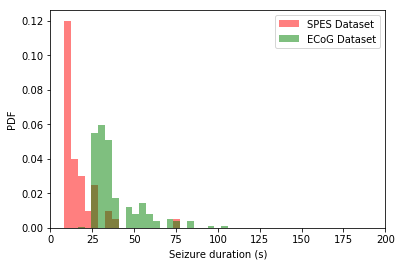

In [319]:
bins = np.linspace(0, 200, 50)
plt.hist(newsc,bins,color='red',alpha=0.5,density=True, label = 'SPES Dataset')
plt.hist(oldsc,bins,color='green',alpha=0.5,density=True, label = 'ECoG Dataset')
plt.legend(loc = 'upper right')
plt.xlim(0,200)
plt.xlabel('Seizure duration (s)')
plt.ylabel('PDF')
plt.title('')

In [315]:
print(np.mean(newsc))
print(np.std(newsc))

17.448979591836736
10.984332486922316


In [316]:
print(np.mean(oldsc))
print(np.std(oldsc))

38.155080213903744
15.113386543096565
